#### 4. Develop a classification system for handwritten digit recognition using the MNIST dataset, leveraging Bayes' Decision Theory to optimize decision-making and minimize classification error. 

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [6]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [7]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



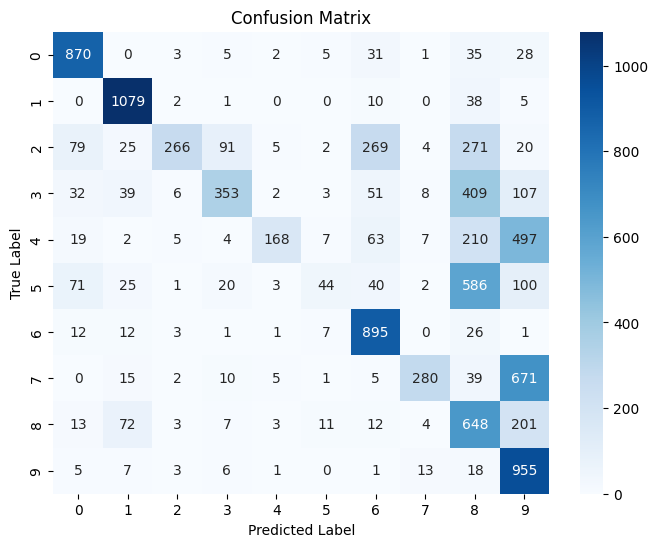

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel('True Label')
plt.title("Confusion Matrix")
plt.show()

In [15]:
def plot_classification_result(X_test, y_test, y_pred, correct=True, num_samples=5):
    indices = np.where(y_test == y_pred if correct else y_test != y_pred)[0]
    selected_indices = np.random.choice(indices, min(num_samples, len(indices)), replace=True)

    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(selected_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {y_pred[idx]}\nTrue: {y_test[idx]}")
        plt.axis('off')
    plt.show()

Correctly Classified Digits: 


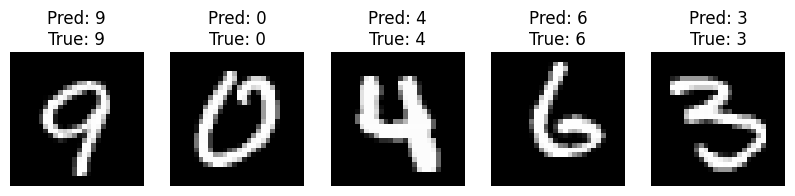

Misclassified Digits: 


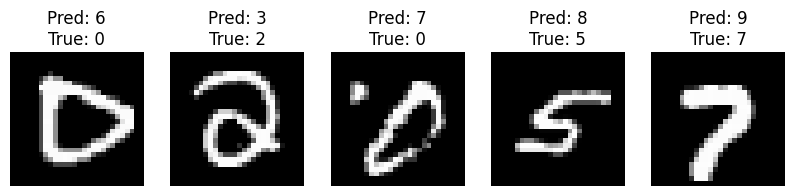

In [16]:
print("Correctly Classified Digits: ")
plot_classification_result(X_test, y_test, y_pred, correct=True)

print("Misclassified Digits: ")
plot_classification_result(X_test, y_test, y_pred, correct=False)

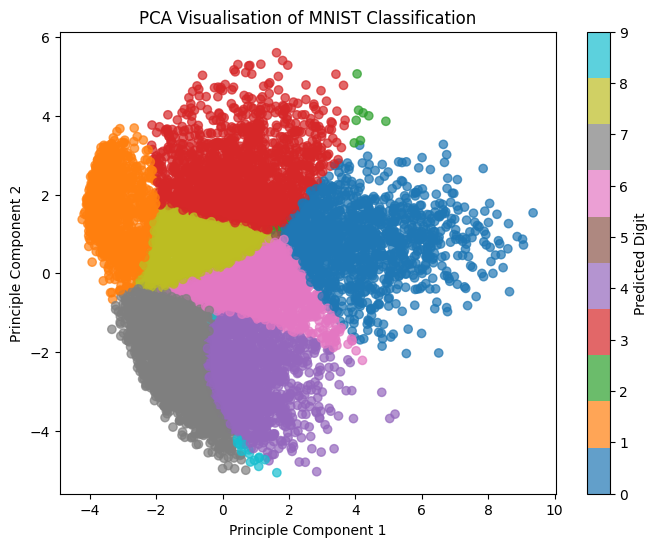

In [ ]:
#OPTIONAL
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train)

y_pred_pca = gnb_pca.predict(X_test_pca)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_pca, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Predicted Digit')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("PCA Visualisation of MNIST Classification")
plt.show()